In [1]:
from fastai.vision.all import *
import datetime
import fastai
import json

In [2]:
torch.cuda.set_device(3)

In [3]:
batch_tfms = aug_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [39]:
data_block = DataBlock(blocks = (ImageBlock, CategoryBlock), 
                           splitter=RandomSplitter(0.2),
                           get_items=get_image_files, 
                           get_y=parent_label,
                           item_tfms = Resize(224),
                           batch_tfms = batch_tfms) 
path =  '/home/luca/fastai/elegroup1/plant_seedlings_v2'
data_loader = data_block.dataloaders(path)

In [63]:
learner = cnn_learner(data_loader, fastai.vision.models.resnet152, pretrained=True, metrics=[accuracy],cbs=CSVLogger( "152_history" +".csv", append=False))

In [98]:
learner = learner.load('stage-5')

In [99]:
results= {}
start = torch.cuda.Event(enable_timing=True)
end =  torch.cuda.Event(enable_timing=True)
results["prediction"] = []
results["time"]=[]
results["truth"] = []

In [66]:
fnames = get_image_files("./Dataset/Database_Random")
print(str(file.parent).replace('/home/ele_group_1/ml/Milestone6/Dataset/Database_Random/',''))
dummy = cnn_learner(data_loader, fastai.vision.models.alexnet, metrics=accuracy,).to_fp16()


Dataset/Database_Random/sugar_beet


In [67]:
for _ in range(10):
        for file in fnames:
            _ = dummy.predict(file)
            break
classified_result = []
timings = []
ground_truth = []

for file in fnames:
    with torch.no_grad():
          #torch.cuda.synchronize()
        start.record()
        result = learner.predict(file)
        end.record()
        torch.cuda.synchronize()
        classified_result.append(str(result[0]))
        #in milliseconds
        timings.append(start.elapsed_time(end))
        ground_truth.append(str(file.parent).replace('Dataset/Database_Random/',''))  
results["prediction"] = classified_result
results["time"]=timings
results["truth"] = ground_truth
with open('data.json', 'w') as fp:
        json.dump(results, fp)

In [68]:
print(results["prediction"])
print(results["truth"])

['black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'loose_silky_bent', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'loose_silky_bent', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'charlock', 'charlock', 'char

In [69]:
total_correct = 0
total_wrong = 0
for i in range(len(results["prediction"])):
    if(results["prediction"][i]==results["truth"][i]):
        total_correct +=1
    else:
        total_wrong +=1
print(total_correct)
print(total_wrong)

895
5


SuggestedLRs(valley=9.120108734350652e-05)

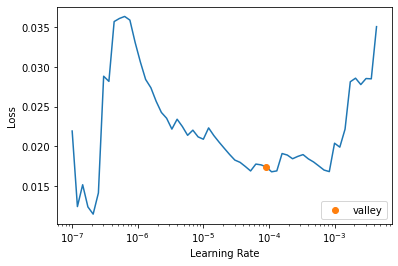

In [52]:
learner.lr_find()

In [100]:
data_block = DataBlock(blocks = (ImageBlock, CategoryBlock), 
                           splitter=RandomSplitter(0.2),
                           get_items=get_image_files, 
                           get_y=parent_label,
                           item_tfms = Resize(224),
                           batch_tfms = batch_tfms) 
path =  './Dataset/DR_Updated/Database_Random'
data_loader = data_block.dataloaders(path)


#learn.dls

In [101]:
learner.dls = data_loader

SuggestedLRs(valley=0.0003981071640737355)

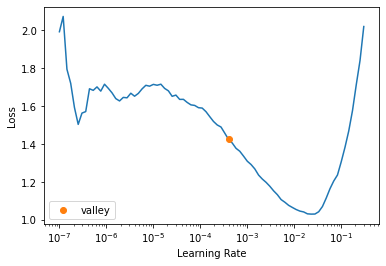

In [102]:
learner.lr_find()

In [103]:
lr = 10e-4
learner.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.554556,1.768942,0.633333,00:06
1,1.010997,0.629867,0.794444,00:05
2,0.704657,0.311228,0.872222,00:06
3,0.512904,0.325193,0.894444,00:05
4,0.399656,0.229035,0.905556,00:05
5,0.311173,0.238455,0.911111,00:06
6,0.247847,0.243519,0.916667,00:05
7,0.203866,0.210259,0.927778,00:05
8,0.165114,0.204942,0.933333,00:06
9,0.139367,0.205172,0.933333,00:05


SuggestedLRs(valley=0.0005754399462603033)

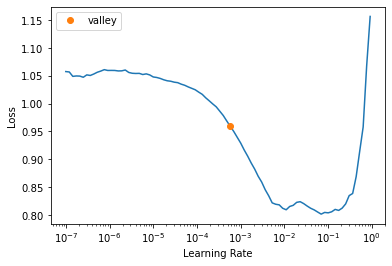

In [104]:
resnet152.unfreeze()
resnet152.lr_find()

In [105]:
learner.fit_one_cycle(10, slice(1e-3,lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.058617,0.199110,0.927778,00:05
1,0.053545,0.181218,0.933333,00:05
2,0.053579,0.183438,0.933333,00:06
3,0.052579,0.210578,0.927778,00:05
4,0.049465,0.232406,0.922222,00:06
5,0.048326,0.213524,0.916667,00:06
6,0.043801,0.200718,0.916667,00:06
7,0.039407,0.190561,0.916667,00:06
8,0.037191,0.187344,0.922222,00:06
9,0.032877,0.191270,0.922222,00:05


In [106]:
learner = learner.load('stage-5')

In [77]:
data_block = DataBlock(blocks = (ImageBlock, CategoryBlock), 
                           splitter=RandomSplitter(0.2),
                           get_items=get_image_files, 
                           get_y=parent_label,
                           item_tfms = Resize(224),
                           batch_tfms = batch_tfms) 
path =  './Dataset/DG_Updated/Dataset_Google'
data_loader = data_block.dataloaders(path)

learner.dls = data_loader

SuggestedLRs(valley=0.0002290867705596611)

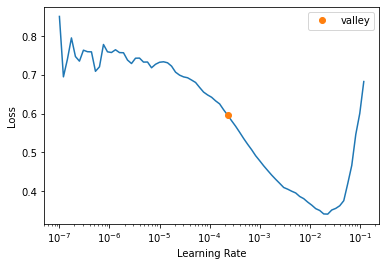

In [109]:

learner.fine_tune(10, freeze_epochs = 5)

epoch,train_loss,valid_loss,accuracy,time
0,0.015624,0.294827,0.916667,00:05
1,0.012926,0.244681,0.933333,00:06
2,0.014661,0.269968,0.922222,00:05
3,0.016092,0.351295,0.894444,00:05
4,0.020245,0.348765,0.916667,00:05


epoch,train_loss,valid_loss,accuracy,time
0,0.009214,0.292688,0.933333,00:06
1,0.033967,0.363768,0.916667,00:06
2,0.050557,0.697487,0.866667,00:06
3,0.063050,0.663187,0.877778,00:06
4,0.085884,0.304797,0.927778,00:06
5,0.085560,0.336753,0.900000,00:06
6,0.080876,0.425392,0.905556,00:07
7,0.070357,0.430757,0.894444,00:06
8,0.060236,0.437082,0.894444,00:06
9,0.055607,0.404880,0.894444,00:06


SuggestedLRs(valley=0.0002290867705596611)

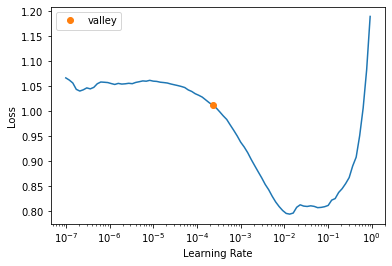

In [80]:
resnet152.unfreeze()
resnet152.lr_find()

In [81]:
learner.fit_one_cycle(10, slice(1e-4,lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.034805,0.139888,0.937500,00:04
1,0.036473,0.137349,0.937500,00:04
2,0.031611,0.133356,0.937500,00:04
3,0.027673,0.130866,0.937500,00:04
4,0.023325,0.130002,0.958333,00:04
5,0.020198,0.126829,0.937500,00:04
6,0.018373,0.130459,0.937500,00:04
7,0.018869,0.133646,0.937500,00:04
8,0.017626,0.133164,0.937500,00:04
9,0.017529,0.132909,0.937500,00:04


In [85]:
with torch.no_grad():
          #torch.cuda.synchronize()
        start.record()
        result = learner.predict("inference/ruebe_gr.jpg")
        end.record()
        torch.cuda.synchronize()
        classified_result.append(str(result[0]))
        print(result)
        #in milliseconds
        timings.append(start.elapsed_time(end))
        ground_truth.append(str(file.parent).replace('Dataset/Database_Random/',''))  
results["prediction"] = classified_result
results["time"]=timings
results["truth"] = ground_truth

('sugar_beet', TensorBase(11), TensorBase([4.0546e-02, 7.2252e-02, 1.1520e-01, 5.0562e-03, 2.3653e-01, 7.4759e-04,
        1.1422e-02, 7.3472e-02, 5.6466e-02, 1.8423e-03, 1.2676e-04, 3.8635e-01]))


In [83]:
print(results)

{'prediction': ['black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'loose_silky_bent', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'loose_silky_bent', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'black_grass', 'charlock', 'c

In [86]:
learner.save("to_use")

Path('models/to_use.pth')

In [96]:
fnames = get_image_files('./Dataset/DR_Updated/Database_Random')
print(str(file.parent).replace('/home/ele_group_1/ml/Milestone6/Dataset/Database_Random/',''))
dummy = cnn_learner(data_loader, fastai.vision.models.alexnet, metrics=accuracy,).to_fp16()

for _ in range(10):
        for file in fnames:
            _ = dummy.predict(file)
            break
classified_result = []
timings = []
ground_truth = []

for file in fnames:
    with torch.no_grad():
          #torch.cuda.synchronize()
        start.record()
        result = learner.predict(file)
        end.record()
        torch.cuda.synchronize()
        classified_result.append(str(result[0]))
        #in milliseconds
        timings.append(start.elapsed_time(end))
        ground_truth.append(str(file.parent).replace('Dataset/DR_Updated/Database_Random/',''))  
results["prediction"] = classified_result
results["time"]=timings
results["truth"] = ground_truth
with open('data.json', 'w') as fp:
        json.dump(results, fp)

Dataset/DR_Updated/Database_Random/sugar_beet


In [97]:

#print(results["truth"])
total_correct = 0
total_wrong = 0
for i in range(len(results["prediction"])):
    if(results["prediction"][i]==results["truth"][i]):
        total_correct +=1
    else:
        total_wrong +=1
print(total_correct)
print(total_wrong)

106
794
